# Result anaysis of DENSER algorithm

In [43]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# subpath = "cifar10/pop50_gen50_run30"
subpath = "MNIST/pop50_gen50_run4"

## 1. Generate plots of the results

In [44]:
import plot_results as pr
pr.read_results(subpath)

## Create grid

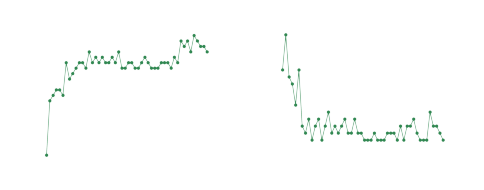

In [57]:
import matplotlib.pyplot as plt

gen_acc_cifar = plt.imread("results/cifar10/pop50_gen50_run30/plot/generation_accuracy.png")
gen_len_cifar = plt.imread("results/cifar10/pop50_gen50_run30/plot/generation_net_len.png")


cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(1, 2, figsize=(12*cm , 5*cm),  layout="constrained")


ax1 = axes[0]
ax1.axis('off')
ax1.imshow(gen_acc_cifar)

ax2 = axes[1]
ax2.axis('off')
ax2.imshow(gen_len_cifar)


plt.savefig('tmp/plot-cifar.png', dpi=300, transparent=True)

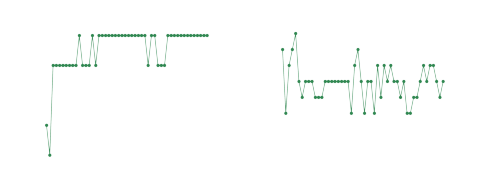

In [58]:
import matplotlib.pyplot as plt


gen_acc_mnist = plt.imread("results/MNIST/pop50_gen50_run4/plot/generation_accuracy.png")
gen_len_mnist = plt.imread("results/MNIST/pop50_gen50_run4/plot/generation_net_len.png")

cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(1, 2, figsize=(12*cm , 5*cm),  layout="constrained")



ax3 = axes[0]
ax3.axis('off')
ax3.imshow(gen_acc_mnist)

ax4 = axes[1]

ax4.axis('off')
ax4.imshow(gen_len_mnist)

plt.savefig('tmp/plot-mnist.png', dpi=300, transparent=True)

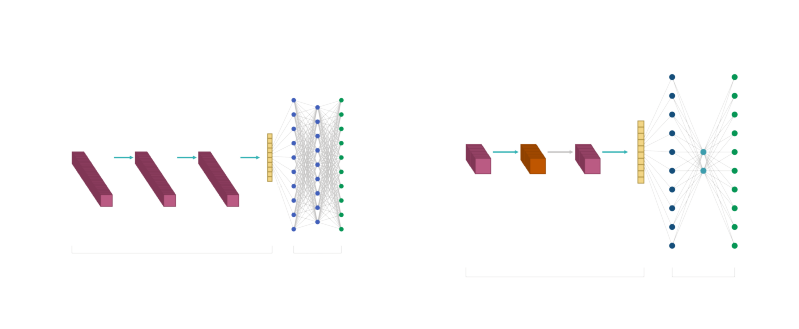

In [59]:
import matplotlib.pyplot as plt


best_cifar = plt.imread("results/cifar10/pop50_gen50_run30/gen049.png")
best_mnist = plt.imread("results/MNIST/pop50_gen50_run4/gen049.png")

cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(1, 2, figsize=(20*cm , 11*cm),  layout="constrained")



ax3 = axes[0]
ax3.axis('off')
ax3.set_title("CIFAR-10, Acc: 77%", color="white", fontsize=12)
ax3.imshow(best_cifar)

ax4 = axes[1]
ax4.set_title("MNIST, Acc: 99.39%", color="white", fontsize=12)
ax4.axis('off')
ax4.imshow(best_mnist)

plt.savefig('tmp/best.png', dpi=300, transparent=True)

## Create net

In [1]:
from src.dsge_level import *
from src.ga_level import *
%load_ext autoreload
%autoreload 2

In [2]:
layer1 = Layer(type = layer_type.CONV, c_out=48, param={'kernel_size': 5, 'stride': 1, 'padding': 'valid', 'bias': False})
layer2 = Layer(type = layer_type.BATCH_NORM, c_out=48, param={'eps': 8.14, 'momentum': 0.77})
layer3 = Layer(type = layer_type.ACTIVATION, c_out=48, param=activation.RELU)

layer4 = Layer(type =layer_type.POOLING, c_out=48, param={'pool_type': pool.MAX, 'kernel_size': 7, 'stride': 1, 'padding': 0})
layer5 = Layer(type = layer_type.CONV, c_out=48, param={'kernel_size': 5, 'stride': 1, 'padding': 'valid', 'bias': False})
layer6 = Layer(type = layer_type.BATCH_NORM, c_out=48, param={'eps': 5.34, 'momentum': 0.41})
layer7 = Layer(type = layer_type.ACTIVATION, c_out=48, param=activation.RELU)

layer8 = Layer(type=layer_type.LINEAR, c_out=100)
layer9 = Layer(type=layer_type.ACTIVATION, c_out=100, param=activation.SIGMOID)

layer10 = Layer(type=layer_type.LINEAR, c_out=10)
layer11 = Layer(type=layer_type.ACTIVATION, c_out=10, param=activation.SOFTMAX)

init layer_type.CONV
init layer_type.BATCH_NORM
init layer_type.ACTIVATION
init layer_type.POOLING
init layer_type.CONV
init layer_type.BATCH_NORM
init layer_type.ACTIVATION
init layer_type.LINEAR
init layer_type.ACTIVATION
init layer_type.LINEAR
init layer_type.ACTIVATION


In [3]:
module1 = Module(module_types.FEATURES, layers=[layer1, layer2, layer3])
module2 = Module(module_types.FEATURES, layers=[layer4])
module3 = Module(module_types.FEATURES, layers=[layer5, layer6, layer7])
module4 = Module(module_types.CLASSIFICATION, layers=[layer8, layer9])
module5 = Module(module_types.LAST_LAYER, layers=[layer10, layer11])

In [4]:
netcode = Net_encoding(3,2,1,10,28,[module1, module2, module3, module4, module5])

In [9]:
netcode.draw(49, f"results/{subpath}")

In [96]:
layer8.param

AttributeError: 'Layer' object has no attribute 'param'

In [101]:
layer8 = Layer(type=layer_type.LINEAR, c_out=100)


init layer_type.LINEAR
